In [1]:
!pip install gradientai --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 7.5 MB/s eta 0:00:00


In [2]:
import os
os.environ['GRADIENT_ACCESS_TOKEN'] = "jNHWNUDxYWCDA5FL3eM9LWUkVf4nto2d"
os.environ['GRADIENT_WORKSPACE_ID'] = "fc9472b9-21be-4136-b210-5a9abdb5c169_workspace"

In [7]:
import json
from gradientai import Gradient
import pandas as pd

## Train the model with new parameters

In [4]:

#read training data
file_path = '/content/drive/MyDrive/train_Up_Llama2.jsonl'  # Replace with the actual path to your JSON file

with open(file_path, 'r') as file:
    # Load the JSON data
    data_train = json.load(file)
print(len(data_train))

201


## Learning rate parameter , num_epochs, batch_size_limit

In [ ]:


def main():

  with Gradient() as gradient:
      #nous-hermes2 is a fine tuned vesion of Llama-2 13B Nous Hermes 2
      base_model = gradient.get_base_model(base_model_slug="nous-hermes2")

      #make a copy of the base model aims to fine-tuned
      new_model_adapter = base_model.create_model_adapter(
          name="CCSIT_InfoBot",
          learning_rate=0.001
      )

      # this is where fine-tuning happens
      # num_epochs is the number of times you fine-tune the model
      # more epochs tends to get better results, but you also run the risk of "overfitting"
      # play around with this number to find what works best for you
      num_epochs = 5
      batch_size_limit = 100
      count = 0

      while count < num_epochs:
          print(f"Fine-tuning the model, iteration {count + 1}")

          # Ensure that each iteration uses a batch size within the limit
          for start_idx in range(0, len(data_train), batch_size_limit):
              end_idx = start_idx + batch_size_limit
              batch_data = data_train[start_idx:end_idx]

              # Call the fine_tune method with the current batch
              new_model_adapter.fine_tune(samples=batch_data)

          count += 1


if __name__ == "__main__":
    main()

## Test the model with hyperparameters

In [10]:
#read and restructure the query format and save it in a Data Frame


file_path = '/content/drive/MyDrive/test_Up_Llama2.jsonl'  # Replace with the actual path to your JSON file

with open(file_path, 'r') as file:
    # Load the JSON data
    data_train = json.load(file)
final_df = pd.DataFrame(columns=['instruction', 'response','Generate Response'])
for i in range(len(data_train)):
  l = data_train[i]
  instruction = l['inputs'].split('### Response:')[0].strip() + '\\n\\n ### Response:'
  response = '### Response:' + l['inputs'].split('### Response:')[1].strip()
  temp_df = pd.DataFrame({
    'instruction': [instruction],
    'response': [response],
    'Generate Response' :''
  })

  # Append the temporary DataFrame to the final DataFrame
  final_df = final_df.append(temp_df, ignore_index=True)

<ipython-input-10-d43d692e8afc>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(temp_df, ignore_index=True)
<ipython-input-10-d43d692e8afc>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(temp_df, ignore_index=True)
<ipython-input-10-d43d692e8afc>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(temp_df, ignore_index=True)
<ipython-input-10-d43d692e8afc>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(temp_df, ignore_index=True)
<ipython-input-10-d43d692e8afc>:21: FutureWarning: The frame.append method is deprecated and wil

## max_generated_token_count=128, temperature=0, top_k=50

In [11]:
#test model with whole testing set


def main():
  with Gradient() as gradient:

      #nous-hermes2 is a fine tuned vesion of Llama-2 13B Nous Hermes 2
      base_model = gradient.get_base_model(base_model_slug="nous-hermes2")

      #make a copy of the base model aims to fine-tuned
      new_model_adapter = base_model.create_model_adapter(
          name="CCSIT_InfoBot"
      )
      for i in range(len(final_df)):
        sample_query = final_df['instruction'][i]
        # after fine-tuning
        completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=128, temperature=0, top_k=50).generated_output
        print(f"Generated (after fine-tune): {completion}")
        final_df['Generate Response'][i] = completion

#new_model_adapter.delete()
if __name__ == "__main__":
    main()

Generated (after fine-tune):  I'm sorry but I'm not familiar with the IAU university. Could you please provide more information or context about the university so I can assist you better?
Generated (after fine-tune):  The College of Computer Science and Information Technology was established in the year 2000.
Generated (after fine-tune):  The goals of the College vary depending on the specific institution, but some common goals include providing a well-rounded education, fostering critical thinking and analytical skills, preparing students for their future careers, and promoting personal growth and development. Additionally, many colleges aim to create a diverse and inclusive campus community, engage students in research and service learning, and maintain strong relationships with alumni and the local community.
Generated (after fine-tune):  The College has a multi-layered approach to financial sustainability which includes, revenue enhancement, cost containment, and resource utilizati

In [12]:
file_path = 'parameter_Llama2.csv'
final_df.to_csv(file_path, index=False)

## Read the File

In [13]:
df = pd.read_csv('/content/parameter_Llama2.csv', index_col=0)
df.head()

,response,Generate Response
instruction,,
### Instruction: What is the student population of the IAU university?\n\n ### Response:,### Response:The student population of the uni...,I'm sorry but I'm not familiar with the IAU u...
### Instruction: When was the College of Computer Science and Information Technology established?\n\n ### Response:,### Response:The College was established in 2010.,The College of Computer Science and Informati...
### Instruction: What are some of the goals of the College?\n\n ### Response:,### Response:Goals include offering quality ed...,The goals of the College vary depending on th...
### Instruction: What is the College's approach to financial sustainability?\n\n ### Response:,### Response:The College aims to strengthen fi...,The College has a multi-layered approach to f...
### Instruction: Can you share some examples of research areas at CCSIT?\n\n ### Response:,### Response:Research areas at CCSIT include a...,Certainly! Here are just a few examples of re...


In [15]:
df=df.reset_index()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   instruction        44 non-null     object
 1   response           44 non-null     object
 2   Generate Response  44 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [17]:
#new data frame for the response coulmn
response = pd.DataFrame()
# Define a regular expression to extract text after "### Response:"
pattern = "### Response:(.+)"

# Apply the regular expression and create a new column with the extracted text
response['Original_Response'] = df['response'].str.extract(pattern)

# Display the DataFrame with the new column
response.head()


,Original_Response
0,The student population of the university is ov...
1,The College was established in 2010.
2,Goals include offering quality education in th...
3,The College aims to strengthen financial self-...
4,Research areas at CCSIT include artificial int...


## Bleu score

In [18]:
import nltk

# Download the NLTK data for calculating BLEU
nltk.download('punkt')
nltk.download('wordnet')

from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_bleu_score(candidate, reference):
    # Convert the candidate and reference sentences into tokenized lists
    candidate_tokens = nltk.word_tokenize(candidate)
    reference_tokens = nltk.word_tokenize(reference)

    # print( candidate_tokens , "\n_____\n" , reference_tokens , "\n*****")

    # Calculate BLEU score using the sentence_bleu function
    smoothing = SmoothingFunction().method4
    bleu_score = sentence_bleu(reference_tokens, candidate_tokens, smoothing_function=smoothing)


    return bleu_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
df['BLEU'] = None
for i in range(len(df)):
  df['BLEU'][i] = calculate_bleu_score(df['Generate Response'][i], response['Original_Response'][i])

In [26]:
#average of BLEU results

avg_BLEU = df['BLEU'].mean()*100
avg_BLEU

0.5701813603065118

## ROUGE Score

In [21]:
! pip install -r rouge/requirements.txt
! pip install rouge-score

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'rouge/requirements.txt'
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=b9961e732806ed9d2f8ab485c1c16ad18ba8a3e354f8092ecfed883c3b3a71ca
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [22]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

#ROUGE-1 measures unigram overlap between the model-generated summary and the reference summary.
df['rouge1_precision'] = None
df['rouge1_recal'] = None
df['rouge1_fmeasure'] = None

#ROUGE-L considers the longest common subsequence (LCS) of words between the model-generated summary and the reference summary.
df['rougeL_precision'] = None
df['rougeL_recal'] = None
df['rougeL_fmeasure'] = None


for i in range(len(df)):
  score = scorer.score(response['Original_Response'][i],df['Generate Response'][i])
  pre , recall , fmeasure  = score['rouge1']
  df['rouge1_precision'][i] = pre
  df['rouge1_recal'][i] = recall
  df['rouge1_fmeasure'][i] = fmeasure

  pre , recall , fmeasure  = score['rougeL']
  df['rougeL_precision'][i] = pre
  df['rougeL_recal'][i] = recall
  df['rougeL_fmeasure'][i] = fmeasure

df.head()


,instruction,response,Generate Response,BLEU,rouge1_precision,rouge1_recal,rouge1_fmeasure,rougeL_precision,rougeL_recal,rougeL_fmeasure
0,### Instruction: What is the student populatio...,### Response:The student population of the uni...,I'm sorry but I'm not familiar with the IAU u...,0.009048,0.103448,0.3,0.153846,0.103448,0.3,0.153846
1,### Instruction: When was the College of Compu...,### Response:The College was established in 2010.,The College of Computer Science and Informati...,0.016591,0.357143,0.833333,0.5,0.357143,0.833333,0.5
2,### Instruction: What are some of the goals of...,### Response:Goals include offering quality ed...,The goals of the College vary depending on th...,0.006026,0.176471,0.413793,0.247423,0.117647,0.275862,0.164948
3,### Instruction: What is the College's approac...,### Response:The College aims to strengthen fi...,The College has a multi-layered approach to f...,0.004858,0.08046,0.4375,0.135922,0.08046,0.4375,0.135922
4,### Instruction: Can you share some examples o...,### Response:Research areas at CCSIT include a...,Certainly! Here are just a few examples of re...,0.003727,0.126582,0.588235,0.208333,0.101266,0.470588,0.166667


## METEOR Score

In [23]:
from nltk.tokenize import word_tokenize
from nltk.translate import meteor_score

# Function to tokenize a sentence
def tokenize_sentence(sentence):
    return word_tokenize(sentence.lower())

# Function to calculate METEOR score for a pair of tokenized sentences
def calculate_meteor_score(reference, candidate):
    return meteor_score.single_meteor_score(reference, candidate)

df['METEOR']=None

# Iterate through rows and calculate METEOR scores
for i in range(len(df)):
    # Tokenize reference and candidate sentences
    reference_tokens = tokenize_sentence(response['Original_Response'][i])
    candidate_tokens = tokenize_sentence(df['Generate Response'][i])

    # Calculate METEOR score and assign to 'METEOR' column
    df['METEOR'][i] = calculate_meteor_score(reference_tokens, candidate_tokens)

# Display the updated DataFrame
df.head()

,instruction,response,Generate Response,BLEU,rouge1_precision,rouge1_recal,rouge1_fmeasure,rougeL_precision,rougeL_recal,rougeL_fmeasure,METEOR
0,### Instruction: What is the student populatio...,### Response:The student population of the uni...,I'm sorry but I'm not familiar with the IAU u...,0.009048,0.103448,0.3,0.153846,0.103448,0.3,0.153846,0.260847
1,### Instruction: When was the College of Compu...,### Response:The College was established in 2010.,The College of Computer Science and Informati...,0.016591,0.357143,0.833333,0.5,0.357143,0.833333,0.5,0.655271
2,### Instruction: What are some of the goals of...,### Response:Goals include offering quality ed...,The goals of the College vary depending on th...,0.006026,0.176471,0.413793,0.247423,0.117647,0.275862,0.164948,0.272728
3,### Instruction: What is the College's approac...,### Response:The College aims to strengthen fi...,The College has a multi-layered approach to f...,0.004858,0.08046,0.4375,0.135922,0.08046,0.4375,0.135922,0.17094
4,### Instruction: Can you share some examples o...,### Response:Research areas at CCSIT include a...,Certainly! Here are just a few examples of re...,0.003727,0.126582,0.588235,0.208333,0.101266,0.470588,0.166667,0.301351


In [25]:
#average of METEOR results
avg_METEOR = df['METEOR'].mean()*100
avg_METEOR

28.539535457628507

## BERT score

In [27]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.7 MB/s eta 0:00:00


In [28]:
from bert_score import score
import pandas as pd

In [29]:


# Assuming you have a DataFrame named 'df' with columns 'Original_Response' and 'Generate_Response'
# df = pd.DataFrame(...)

def calculate_bert_score(reference, candidate):
    P, R, F1 = score([reference], [candidate], lang="en", verbose=True)
    return P[0].item(), R[0].item(), F1[0].item() #extracting the scalar value at the first index of the PyTorch tensor P.

# Create new columns for BERT scores
df['BERTScore_P'] = None
df['BERTScore_R'] = None
df['BERTScore_F'] = None

# Iterate through rows and calculate BERT scores
for i in range(len(df)):
    ref_response = response['Original_Response'][i]
    gen_response = df['Generate Response'][i]

    # Calculate BERT scores
    pre, recall, fmeasure = calculate_bert_score(ref_response, gen_response)

    # Assign BERT scores to DataFrame
    df.at[i, 'BERTScore_P'] = pre
    df.at[i, 'BERTScore_R'] = recall
    df.at[i, 'BERTScore_F'] = fmeasure

# Display the updated DataFrame
print(df.head())


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.54 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.53 seconds, 1.88 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.57 seconds, 0.64 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.07 seconds, 0.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.97 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.20 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.30 seconds, 0.43 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.61 seconds, 0.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.29 seconds, 0.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.08 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.29 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.98 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.13 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.19 seconds, 0.31 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.46 seconds, 0.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.93 seconds, 0.34 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.06 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.86 seconds, 1.16 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.66 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.94 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.21 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.10 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.22 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.16 seconds, 0.87 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.93 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.22 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.26 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.50 seconds, 0.67 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.08 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 7.46 seconds, 0.13 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.37 seconds, 0.30 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.07 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.09 seconds, 0.48 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.12 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.95 seconds, 0.51 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.11 seconds, 0.32 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.18 seconds, 0.46 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.61 seconds, 0.62 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.00 seconds, 0.33 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.48 seconds, 0.68 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.73 seconds, 0.37 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.03 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.29 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.50 seconds, 0.40 sentences/sec
                                         instruction  \
0  ### Instruction: What is the student populatio...   
1  ### Instruction: When was the College of Compu...   
2  ### Instruction: What are some of the goals of...   
3  ### Instruction: What is the College's approac...   
4  ### Instruction: Can you share some examples o...   

                                            response  \
0  ### Response:The student population of the uni...   
1  ### Response:The College was established in 2010.   
2  ### Response:Goals include offering quality ed...   
3  ### Response:The College aims to strengthen fi...   
4  ### Response:Research areas at CCSIT include a...   

                                   Generate Response      BLEU  \
0   I'm sorry but I'm not familiar with the IAU u...  0.009048   
1   The College of Computer Science and Informati...  0.016591   
2   The goals of the College vary depending on th...  0.006026   
3   The College has a

In [30]:
df.head()

,instruction,response,Generate Response,BLEU,rouge1_precision,rouge1_recal,rouge1_fmeasure,rougeL_precision,rougeL_recal,rougeL_fmeasure,METEOR,BERTScore_P,BERTScore_R,BERTScore_F
0,### Instruction: What is the student populatio...,### Response:The student population of the uni...,I'm sorry but I'm not familiar with the IAU u...,0.009048,0.103448,0.3,0.153846,0.103448,0.3,0.153846,0.260847,0.865683,0.827672,0.846251
1,### Instruction: When was the College of Compu...,### Response:The College was established in 2010.,The College of Computer Science and Informati...,0.016591,0.357143,0.833333,0.5,0.357143,0.833333,0.5,0.655271,0.94478,0.88137,0.911974
2,### Instruction: What are some of the goals of...,### Response:Goals include offering quality ed...,The goals of the College vary depending on th...,0.006026,0.176471,0.413793,0.247423,0.117647,0.275862,0.164948,0.272728,0.880422,0.861439,0.870827
3,### Instruction: What is the College's approac...,### Response:The College aims to strengthen fi...,The College has a multi-layered approach to f...,0.004858,0.08046,0.4375,0.135922,0.08046,0.4375,0.135922,0.17094,0.893494,0.838989,0.865384
4,### Instruction: Can you share some examples o...,### Response:Research areas at CCSIT include a...,Certainly! Here are just a few examples of re...,0.003727,0.126582,0.588235,0.208333,0.101266,0.470588,0.166667,0.301351,0.876533,0.810588,0.842272


In [8]:
file_path = 'evaluation_Llama2_parameter.csv'
df.to_csv(file_path, index=False)

NameError: ignored

In [10]:
df = pd.read_csv('/content/drive/MyDrive/evaluation_Llama2_parameter.csv')
df.head()

,instruction,response,Generate Response,BLEU,rouge1_precision,rouge1_recal,rouge1_fmeasure,rougeL_precision,rougeL_recal,rougeL_fmeasure,METEOR,BERTScore_P,BERTScore_R,BERTScore_F
0,### Instruction: What is the student populatio...,### Response:The student population of the uni...,I'm sorry but I'm not familiar with the IAU u...,0.009048,0.103448,0.300000,0.153846,0.103448,0.300000,0.153846,0.260847,0.865683,0.827672,0.846251
1,### Instruction: When was the College of Compu...,### Response:The College was established in 2010.,The College of Computer Science and Informati...,0.016591,0.357143,0.833333,0.500000,0.357143,0.833333,0.500000,0.655271,0.944780,0.881370,0.911974
2,### Instruction: What are some of the goals of...,### Response:Goals include offering quality ed...,The goals of the College vary depending on th...,0.006026,0.176471,0.413793,0.247423,0.117647,0.275862,0.164948,0.272728,0.880422,0.861439,0.870827
3,### Instruction: What is the College's approac...,### Response:The College aims to strengthen fi...,The College has a multi-layered approach to f...,0.004858,0.080460,0.437500,0.135922,0.080460,0.437500,0.135922,0.170940,0.893494,0.838989,0.865384
4,### Instruction: Can you share some examples o...,### Response:Research areas at CCSIT include a...,Certainly! Here are just a few examples of re...,0.003727,0.126582,0.588235,0.208333,0.101266,0.470588,0.166667,0.301351,0.876533,0.810588,0.842272


In [12]:
import pandas as pd



# List of evaluation measures
evaluation_measures = ['BLEU', 'rouge1_precision', 'rouge1_recal', 'rouge1_fmeasure',
                        'rougeL_precision', 'rougeL_recal', 'rougeL_fmeasure',
                        'METEOR', 'BERTScore_P', 'BERTScore_R', 'BERTScore_F']

# Create a new DataFrame with relevant columns
df_summary = df[evaluation_measures].describe().transpose()

# Extract the 'mean' column
df_mean = df_summary[['mean']]

# Display the mean values
print(df_mean)


                      mean
BLEU              0.005702
rouge1_precision  0.237340
rouge1_recal      0.462727
rouge1_fmeasure   0.300213
rougeL_precision  0.175984
rougeL_recal      0.357736
rougeL_fmeasure   0.226612
METEOR            0.285395
BERTScore_P       0.870949
BERTScore_R       0.853269
BERTScore_F       0.861873


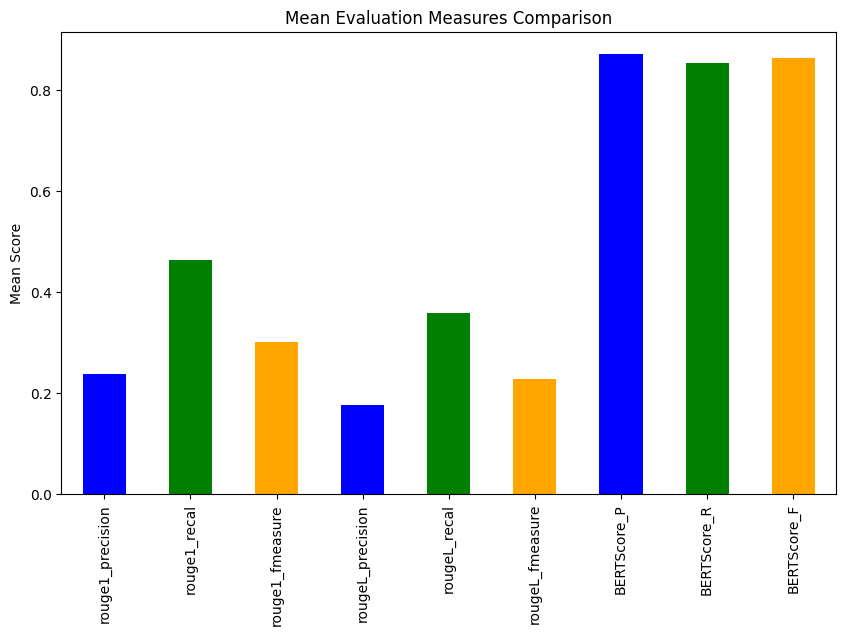

In [44]:
import matplotlib.pyplot as plt
import pandas as pd



# List of evaluation measures
evaluation_measures = ['rouge1_precision', 'rouge1_recal', 'rouge1_fmeasure',
                       'rougeL_precision', 'rougeL_recal', 'rougeL_fmeasure',
                       'BERTScore_P', 'BERTScore_R', 'BERTScore_F']

# Create a new DataFrame with relevant columns
df_means = df[evaluation_measures].mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_means.plot(kind='bar', ax=ax, color=['blue', 'green', 'orange'])
ax.set_ylabel("Mean Score")
ax.set_title("Mean Evaluation Measures Comparison")

plt.show()


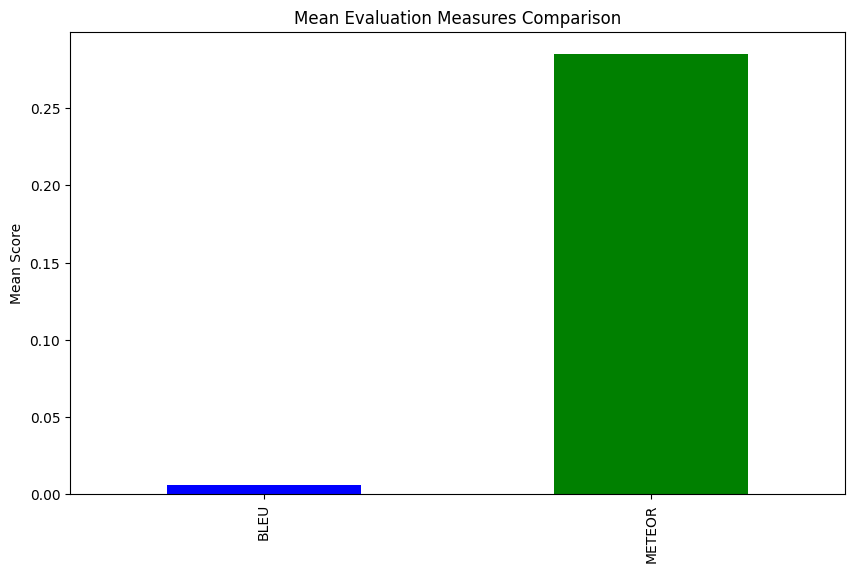

In [45]:
import matplotlib.pyplot as plt
import pandas as pd



# List of evaluation measures
evaluation_measures = ['BLEU','METEOR']

# Create a new DataFrame with relevant columns
df_means = df[evaluation_measures].mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_means.plot(kind='bar', ax=ax, color=['blue', 'green'])
ax.set_ylabel("Mean Score")
ax.set_title("Mean Evaluation Measures Comparison")

plt.show()
